# Face Detection using MTCNN (Multi Task Convolutional Neural Network)

## Dependencies

Berikut adalah daftar modules dan packages yang perlu kita install untuk dapat mengikuti tutorial ini:

- [TensorFlow](https://www.tensorflow.org/)
- [OpenCV](https://opencv.org/)
- [python-tensorflow](https://www.tensorflow.org/install): ```pip install tensorflow```
- [opencv-python](https://pypi.org/project/opencv-python/): ```pip install -U opencv-python```
- [mtcnn](https://pypi.org/project/mtcnn/): ```pip install mtcnn```
- [Matplotlib](https://matplotlib.org/): ```pip install -U matplotlib```

## Import Modules

Berikut adalah beberapa Python modules yang perlu kita import untuk dapat mengikuti tutorial ini.

In [1]:
from mtcnn.mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

## Global Identifiers

Dalam tutorial ini terdapat beberapa file foto yang dapat digunakan untuk mempelajari deteksi wajah.

In [2]:
IMAGE_PATH = './dataset/classroom/03.jpg'
# IMAGE_PATH = './dataset/babies/03.jpg'

## Global Functions

MTCNN akan menandai area wajah yang berhasil dideteksi dengan menggunakan area persegi panjang. Bilamana kita membutuhkan area berbentuk kotak, maka kita perlu membuat sebuah function untuk melakukan konversi dari format persegi panjang ke format kotak.

In [3]:
def rect_to_square(x, y, w, h):
    if w == h:
        return x, y, w, h
    
    alpha = (h - w) // 2
    new_x = x - alpha
    return new_x if new_x>0 else 0, y, h, h     

## Load Image Dataset

Membuat objek image OpenCV

In [4]:
bgr_img = cv2.imread(IMAGE_PATH)
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

## Load Classifier

Memuat object detector beserta pre-trained classifier yang disertakan.

In [5]:
detector = MTCNN()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


## Face Detection

Melakukan proses deteksi wajah menggunakan pre-trained classifier.

In [6]:
detections = detector.detect_faces(rgb_img)
detections

[{'box': [923, 296, 57, 70],
  'confidence': 1.0,
  'keypoints': {'left_eye': (941, 322),
   'right_eye': (969, 325),
   'nose': (954, 338),
   'mouth_left': (941, 352),
   'mouth_right': (962, 355)}},
 {'box': [428, 417, 61, 75],
  'confidence': 0.9999994039535522,
  'keypoints': {'left_eye': (445, 447),
   'right_eye': (474, 446),
   'nose': (463, 461),
   'mouth_left': (449, 475),
   'mouth_right': (475, 474)}},
 {'box': [897, 246, 39, 48],
  'confidence': 0.999990701675415,
  'keypoints': {'left_eye': (908, 265),
   'right_eye': (926, 265),
   'nose': (916, 275),
   'mouth_left': (907, 282),
   'mouth_right': (923, 283)}},
 {'box': [654, 266, 32, 40],
  'confidence': 0.9999847412109375,
  'keypoints': {'left_eye': (663, 282),
   'right_eye': (678, 283),
   'nose': (668, 291),
   'mouth_left': (662, 297),
   'mouth_right': (675, 298)}},
 {'box': [465, 270, 28, 38],
  'confidence': 0.9999794960021973,
  'keypoints': {'left_eye': (473, 285),
   'right_eye': (488, 285),
   'nose': (481

Ekstraksi kumpulan wajah yang terdeteksi ke dalam format tupple. Di sini kita batasi pada wajah yang terdeteksi dengan tingkat kepercayaan atau confidence di atas 0.8.

In [7]:
faces = tuple(tuple(data['box']) for data in detections if data['confidence']>0.8)
faces

((923, 296, 57, 70),
 (428, 417, 61, 75),
 (897, 246, 39, 48),
 (654, 266, 32, 40),
 (465, 270, 28, 38),
 (535, 264, 32, 42),
 (8, 372, 67, 85),
 (883, 395, 81, 96))

MTCNN akan menandai area wajah yang berhasil dideteksi dengan menggunakan area persegi panjang. Bilamana kita membutuhkan area berbentuk kotak, maka kita perlu membuat sebuah function untuk melakukan konversi dari format persegi panjang ke format kotak.

In [8]:
faces = sorted(rect_to_square(*face) for face in faces)
faces = tuple(faces)
faces

((0, 372, 85, 85),
 (421, 417, 75, 75),
 (460, 270, 38, 38),
 (530, 264, 42, 42),
 (650, 266, 40, 40),
 (876, 395, 96, 96),
 (893, 246, 48, 48),
 (917, 296, 70, 70))

## Show Detection Results

Memberi penanda kotak pada setiap wajah yang berhasil dideteksi.

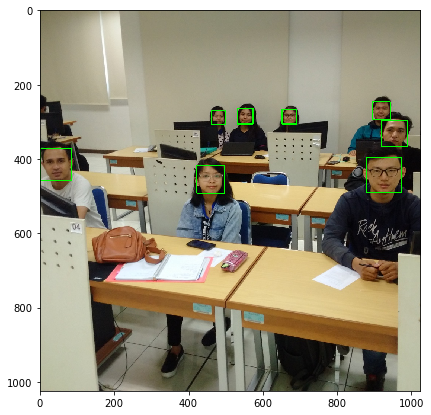

In [9]:
rgb_color = (0, 255, 0)
for face in faces:
    x, y, w, h = face
    cv2.rectangle(rgb_img, (x, y), (x+w, y+h), rgb_color, 2) 

plt.figure(figsize=(7, 7))
plt.imshow(rgb_img)